## Importing necessary libraries

In [418]:
import numpy as np
import pandas as pd
import matplotlib as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Datasets

In [419]:
#loading the datasets

flight = pd.read_csv("/content/drive/MyDrive/Data-Mining/flights.csv")
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [420]:
plane_data = pd.read_csv("/content/drive/MyDrive/Data-Mining/plane-data.csv")
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
flight_routes = pd.read_csv("/content/drive/MyDrive/Data-Mining/us_flight_routes.csv", encoding ="utf-16",delimiter='\t')
flight_routes.tail()

,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Buffer,Destination Airport ID,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
4959,3469,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,False,SFO,San Francisco,United States,San Francisco International Airport,Polygon,3682,33.6367,-84.428101,Point,2138.896563,LineString,11,3469,37.618999,-122.375000,Point
4960,3682,MIA,Miami,United States,Miami International Airport,True,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,Polygon,3576,25.7932,-80.290604,Point,594.601524,LineString,12,3682,33.636700,-84.428101,Point
4961,3576,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,MIA,Miami,United States,Miami International Airport,Polygon,3682,33.6367,-84.428101,Point,594.601524,LineString,12,3576,25.793200,-80.290604,Point
4962,3682,ORD,Chicago,United States,Chicago O'Hare International Airport,True,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,Polygon,3830,41.9786,-87.904800,Point,605.810275,LineString,19,3682,33.636700,-84.428101,Point
4963,3830,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,ORD,Chicago,United States,Chicago O'Hare International Airport,Polygon,3682,33.6367,-84.428101,Point,605.810275,LineString,20,3830,41.978600,-87.904800,Point


## Checking number of Categorical and Numerical Attributes

In [422]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [423]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tailnum        5029 non-null   object 
 1   type           4480 non-null   object 
 2   manufacturer   4480 non-null   object 
 3   issue_date     4479 non-null   object 
 4   model          4480 non-null   object 
 5   status         4480 non-null   object 
 6   aircraft_type  4480 non-null   object 
 7   engine_type    4477 non-null   object 
 8   year           4335 non-null   float64
dtypes: float64(1), object(8)
memory usage: 353.7+ KB


In [424]:
flight_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airport ID              4964 non-null   int64  
 1   Destination Airport     4964 non-null   object 
 2   Destination City        4964 non-null   object 
 3   Destination Country     4964 non-null   object 
 4   Destination Name        4964 non-null   object 
 5   Distance                4964 non-null   bool   
 6   Origin Airport          4964 non-null   object 
 7   Origin City             4964 non-null   object 
 8   Origin Country          4964 non-null   object 
 9   Origin Name             4964 non-null   object 
 10  Buffer                  4964 non-null   object 
 11  Destination Airport ID  4964 non-null   int64  
 12  Destination Latitude    4964 non-null   float64
 13  Destination Longitude   4964 non-null   float64
 14  Destination Point       4964 non-null   

## Checking number of missing values in each dataframe

In [425]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,9430
carrier,0


In [426]:
plane_data.isna().sum()

,0
tailnum,0
type,549
manufacturer,549
issue_date,550
model,549
status,549
aircraft_type,549
engine_type,552
year,694


In [427]:
flight_routes.isna().sum()

,0
Airport ID,0
Destination Airport,0
Destination City,0
Destination Country,0
Destination Name,0
Distance,0
Origin Airport,0
Origin City,0
Origin Country,0
Origin Name,0


## Checking number of rows in each table.

In [428]:
len(flight)


336776

In [429]:
len(plane_data)

5029

In [430]:
len(flight_routes)

4964

## Replacing missing values, and carrying out Data Transformation

Replacing the missing values `dep_time` and `arr_time` with `sched_dep_time` and `sched_arr_time` as we are assuming that if there was no actual departure and arrival time, then the plane departed and arrived as per schedule.

In [431]:
# Replace missing values in dep_time with sched_dep_time
flight.loc[flight['dep_time'].isna(), 'dep_time'] = flight['sched_dep_time']

# Replace missing values in arr_time with sched_arr_time
flight.loc[flight['arr_time'].isna(), 'arr_time'] = flight['sched_arr_time']

flight.isna().sum()


,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,8255
arr_time,0
sched_arr_time,0
arr_delay,9430
carrier,0


Now that we have all the values in `dep_time` and `arr_time`, we can replace the missing values in `dep_delay` and `arr_delay` by subtracting the actual times with the schedule times.

In [432]:
import pandas as pd

# Function to convert HHMM format to total minutes
def convert_to_minutes(time_col):
    # Handle NaN cases for dep_time (since it's float64, it could have NaNs)
    time_col = time_col.fillna(0).astype(int)

    # Extract hours and minutes from HHMM format
    hours = time_col // 100
    minutes = time_col % 100

    # Convert the time into total minutes
    return hours * 60 + minutes

# Convert dep_time and sched_dep_time to minutes
flight['dep_time_minutes'] = convert_to_minutes(flight['dep_time'])
flight['sched_dep_time_minutes'] = convert_to_minutes(flight['sched_dep_time'])

# Replace missing dep_delay values by calculating dep_time - sched_dep_time
flight.loc[flight['dep_delay'].isna(), 'dep_delay'] = flight['dep_time_minutes'] - flight['sched_dep_time_minutes']

# Convert arr_time and sched_arr_time to minutes
flight['arr_time_minutes'] = convert_to_minutes(flight['arr_time'])
flight['sched_arr_time_minutes'] = convert_to_minutes(flight['sched_arr_time'])

# Replace missing arr_delay values by calculating arr_time - sched_arr_time
flight.loc[flight['arr_delay'].isna(), 'arr_delay'] = flight['arr_time_minutes'] - flight['sched_arr_time_minutes']

# Drop the intermediate time columns if no longer needed
flight = flight.drop(columns=['dep_time_minutes', 'sched_dep_time_minutes', 'arr_time_minutes', 'sched_arr_time_minutes'])

# Display the updated flight dataframe
flight.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [433]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Replacing the missing values in `air_time` as well by subtracting `arr_time` with `dep_time`

In [434]:
flight['arr_time_minutes'] = convert_to_minutes(flight['arr_time'])
flight['dep_time_minutes'] = convert_to_minutes(flight['dep_time'])

# Replace missing air_time values by calculating arr_time - dep_time
flight.loc[flight['air_time'].isna(), 'air_time'] = flight['arr_time_minutes'] - flight['dep_time_minutes']

# If you need to handle cases where the flight crosses midnight (e.g., dep_time is 2300 and arr_time is 0100):
flight.loc[flight['air_time'] < 0, 'air_time'] += 24 * 60  # Add 24 hours in minutes to fix negative values

# Drop the intermediate time columns if no longer needed
flight = flight.drop(columns=['arr_time_minutes', 'dep_time_minutes'])

# Display the updated flight dataframe
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [435]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Removing the `time_hour` column as it is not required

In [436]:
# Remove the 'time_hour' column from the flight dataframe
flight = flight.drop(columns=['time_hour'])

# Display the updated flight dataframe
flight.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


## Merging 2 datasets together.

merging `flight` and `plane_data` using left join on `tailnum` column to create a new `merged_data`.

In [437]:
# Perform left join on a common key, e.g., 'plane_id'
# Replace 'plane_id' with the actual column name common to both datasets
merged_data = pd.merge(flight, plane_data, how='left', on='tailnum')

# Display the first few rows of the merged dataset
merged_data.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0


In [438]:
merged_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [439]:
len(merged_data)

336776

We will replace the missing values in the new columns of `merged_data` with "Not Available" because we cannot really replace these values with anything. We cannot make up these values. Hence its best suited to just replace them with saying that the data was not available.

"Not Available" - This will show that there are no missing values and you also don't have to loose any data points (in this case, any flights). When creating visualizations using these columns with "Not Available" values, we will just ignore the Not Available values.

In [440]:
# List of columns where missing values should be replaced with 'Not Available'
columns_to_fill = ['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type', 'engine_type', 'year_y']

# Replace missing values in these columns with 'Not Available'
merged_data[columns_to_fill] = merged_data[columns_to_fill].fillna("Not Available")

# Display the updated plane_data dataframe
merged_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [441]:
flight_routes.columns

Index(['Airport ID', 'Destination Airport', 'Destination City',
       'Destination Country', 'Destination Name', 'Distance', 'Origin Airport',
       'Origin City', 'Origin Country', 'Origin Name', 'Buffer',
       'Destination Airport ID', 'Destination Latitude',
       'Destination Longitude', 'Destination Point ', 'Distance (Miles)',
       'Makeline', 'Number of Airlines', 'Origin Airport ID',
       'Origin Latitude', 'Origin Longitude', 'Origin Point'],
      dtype='object')

In [442]:
merged_data.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year_y'],
      dtype='object')

## Merging the 3rd Dataset.

Combining `merged_data` and `flight_routes` on `origin` and `dest`. This will give us information of Origina airport, Destination airports, Origin City, Destination City and other Route Information.

In [443]:
# Merge the two datasets on origin and destination airport codes
combined_data = pd.merge(merged_data, flight_routes,
                         how='left',
                         left_on=['origin', 'dest'],
                         right_on=['Origin Airport', 'Destination Airport'])

# Display the first few rows of the combined dataset
combined_data.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Buffer,Destination Airport ID,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3550.0,29.9844,-95.341400,Point,1399.812458,LineString,1.0,3494.0,40.692501,-74.168701,Point
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,3697.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,Polygon,3550.0,29.9844,-95.341400,Point,1416.367401,LineString,2.0,3697.0,40.777199,-73.872597,Point
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,3797.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,Polygon,3576.0,25.7932,-80.290604,Point,1089.635644,LineString,3.0,3797.0,40.639801,-73.778900,Point
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,3697.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3682.0,33.6367,-84.428101,Point,761.521651,LineString,7.0,3697.0,40.777199,-73.872597,Point


In [444]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Now, when you display the DataFrame, it will show all columns
combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Buffer,Destination Airport ID,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3550.0,29.984400,-95.341400,Point,1399.812458,LineString,1.0,3494.0,40.692501,-74.168701,Point
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,3697.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,Polygon,3550.0,29.984400,-95.341400,Point,1416.367401,LineString,2.0,3697.0,40.777199,-73.872597,Point
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,3797.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,Polygon,3576.0,25.793200,-80.290604,Point,1089.635644,LineString,3.0,3797.0,40.639801,-73.778900,Point
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,3697.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3682.0,33.636700,-84.428101,Point,761.521651,LineString,7.0,3697.0,40.777199,-73.872597,Point
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3830.0,41.978600,-87.904800,Point,719.156918,LineString,3.0,3494.0,40.692501,-74.168701,Point
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,3494.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3533.0,26.072599,-80.152702,Point,1064.607704,LineString,2.0,3494.0,40.692501,-74.168701,Point
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,3697.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3714.0,38.944500,-77.455803,Point,228.624105,LineString,1.0,3697.0,40.777199,-73.872597,Point
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,3797.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,

In [445]:
combined_data.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year_y', 'Airport ID',
       'Destination Airport', 'Destination City', 'Destination Country',
       'Destination Name', 'Distance', 'Origin Airport', 'Origin City',
       'Origin Country', 'Origin Name', 'Buffer', 'Destination Airport ID',
       'Destination Latitude', 'Destination Longitude', 'Destination Point ',
       'Distance (Miles)', 'Makeline', 'Number of Airlines',
       'Origin Airport ID', 'Origin Latitude', 'Origin Longitude',
       'Origin Point'],
      dtype='object')

Removing unncessary columns that won't be required for analysis.

In [446]:
# Remove the 'time_hour' column from the flight dataframe
combined_data = combined_data.drop(columns=['Buffer','Makeline','Origin Latitude','Origin Longitude','Origin Point','Destination Airport ID',
                                            'Destination Latitude', 'Destination Longitude','Destination Point ','Origin Point',
                                            'Origin Point','Distance (Miles)','Origin Airport ID','Airport ID'])

# Display the updated flight dataframe
combined_data.head(55)


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


In [447]:
combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Let's find out the what are the destination airports that are having missing values for the particular `dest` in our flights.

In [448]:
# Filter rows where 'Destination City' has missing values (NaN)
missing_destination_city = combined_data[combined_data['Destination City'].isna()]

# Get the value counts of 'dest' for those rows
dest_value_counts = missing_destination_city['dest'].value_counts()

dest_value_counts

,count
dest,
SJU,5819
BQN,896
HNL,707
STT,522
BDL,443
PSE,365
MCI,276
AVL,275
IAH,274


Doing the same for Origin as well.

In [449]:
# Filter rows where 'Destination City' has missing values (NaN)
missing_origin_city = combined_data[combined_data['Origin City'].isna()]

# Get the value counts of 'dest' for those rows
missing_origin_counts = missing_destination_city['origin'].value_counts()

missing_origin_counts

,count
origin,
JFK,7736
EWR,2966
LGA,246


To manually replace the missing values in the `Destination City` and `Destination Country` column based on the `dest` codes and their corresponding cities, we can create a mapping between dest and Destination City, and then apply this mapping to fill the missing values.





In [450]:
# Create a mapping dictionary for 'dest' to 'Destination City'
city_mapping = {
    'SJU': 'Carolina',
    'BQN': 'Aguadilla',
    'HNL': 'Honolulu',
    'STT': 'St. Thomas',
    'BDL': 'Windsor Locks',
    'PSE': 'Ponce',
    'MCI': 'Missouri',
    'AVL': 'Fletcher',
    'IAH': 'Houston',
    'ACK': 'Nantucket',
    'MVY': 'West Tisbury',
    'EGE': 'Eagle County',
    'MKE': 'Milwaukee',
    'CRW': 'Charleston',
    'CAE': 'West Columbia',
    'TVC': 'Traverse City',
    'BZN': 'Bozeman',
    'JAC': 'Jackson',
    'PSP': 'Palm Springs',
    'HDN': 'Hayden',
    'MTJ': 'Montrose',
    'BWI': 'Baltimore',
    'SBN': 'South Bend',
    'ANC': 'Anchorage',
    'MEM': 'Memphis',
    'BHM': 'Birmingham',
    'LGA': 'LaGuardia'
}

# Create a mapping dictionary for 'dest' to 'Destination Country'
country_mapping = {
    'SJU': 'Puerto Rico',
    'BQN': 'Puerto Rico',
    'HNL': 'Hawaii',
    'STT': 'US Virgin Islands',
    'BDL': 'United States',
    'PSE': 'Puerto Rico',
    'MCI': 'United States',
    'AVL': 'United States',
    'IAH': 'United States',
    'ACK': 'United States',
    'MVY': 'United States',
    'EGE': 'United States',
    'MKE': 'United States',
    'CRW': 'United States',
    'CAE': 'United States',
    'TVC': 'United States',
    'BZN': 'United States',
    'JAC': 'United States',
    'PSP': 'United States',
    'HDN': 'United States',
    'MTJ': 'United States',
    'BWI': 'United States',
    'SBN': 'United States',
    'ANC': 'United States',
    'MEM': 'United States',
    'BHM': 'United States',
    'LGA': 'United States'
}

# Replace missing values in 'Destination City' using the city_mapping
combined_data['Destination City'] = combined_data['Destination City'].fillna(combined_data['dest'].map(city_mapping))

# Replace missing values in 'Destination Country' using the country_mapping
combined_data['Destination Country'] = combined_data['Destination Country'].fillna(combined_data['dest'].map(country_mapping))

# Display the updated combined_data dataframe
combined_data.isna().sum()


,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Doing the same for Origin City and Origin Country with origin

In [451]:
# Create a mapping dictionary for 'origin' to 'Origin City'
origin_city_mapping = {
    'JFK': 'New York',
    'EWR': 'Newark',
    'LGA': 'LaGuardia'
}

# Create a mapping dictionary for 'origin' to 'Origin Country'
origin_country_mapping = {
    'JFK': 'United States',
    'EWR': 'United States',
    'LGA': 'United States'
}

# Replace missing values in 'Origin City' using the origin_city_mapping
combined_data['Origin City'] = combined_data['Origin City'].fillna(combined_data['origin'].map(origin_city_mapping))

# Replace missing values in 'Origin Country' using the origin_country_mapping
combined_data['Origin Country'] = combined_data['Origin Country'].fillna(combined_data['origin'].map(origin_country_mapping))

combined_data.isna().sum()


,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Creating mappings for Desitnation Name and Origin Name as well.

In [452]:
# Create a mapping dictionary for 'dest' to 'Destination Name' (airport names)
destination_name_mapping = {
    'SJU': 'Luis Muñoz Marín International Airport',
    'BQN': 'Rafael Hernández Airport',
    'HNL': 'Daniel K. Inouye International Airport',
    'STT': 'Cyril E. King Airport',
    'BDL': 'Bradley International Airport',
    'PSE': 'Mercedita International Airport',
    'MCI': 'Kansas City International Airport',
    'AVL': 'Asheville Regional Airport',
    'IAH': 'George Bush Intercontinental Airport',
    'ACK': 'Nantucket Memorial Airport',
    'MVY': 'Martha\'s Vineyard Airport',
    'EGE': 'Eagle County Regional Airport',
    'MKE': 'General Mitchell International Airport',
    'CRW': 'Yeager Airport',
    'CAE': 'Columbia Metropolitan Airport',
    'TVC': 'Cherry Capital Airport',
    'BZN': 'Bozeman Yellowstone International Airport',
    'JAC': 'Jackson Hole Airport',
    'PSP': 'Palm Springs International Airport',
    'HDN': 'Yampa Valley Regional Airport',
    'MTJ': 'Montrose Regional Airport',
    'BWI': 'Baltimore/Washington International Thurgood Marshall Airport',
    'SBN': 'South Bend International Airport',
    'ANC': 'Ted Stevens Anchorage International Airport',
    'MEM': 'Memphis International Airport',
    'BHM': 'Birmingham-Shuttlesworth International Airport',
    'LGA': 'LaGuardia Airport'
}

# Create a mapping dictionary for 'origin' to 'Origin Name' (airport names)
origin_name_mapping = {
    'JFK': 'John F. Kennedy International Airport',
    'EWR': 'Newark Liberty International Airport',
    'LGA': 'LaGuardia Airport'
}

# Replace missing values in 'Destination Name' using the destination_name_mapping
combined_data['Destination Name'] = combined_data['Destination Name'].fillna(combined_data['dest'].map(destination_name_mapping))

# Replace missing values in 'Origin Name' using the origin_name_mapping
combined_data['Origin Name'] = combined_data['Origin Name'].fillna(combined_data['origin'].map(origin_name_mapping))

combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [453]:
# Replace missing values in 'Destination Airport' with the respective values from 'dest'
combined_data['Destination Airport'] = combined_data['Destination Airport'].fillna(combined_data['dest'])

# Replace missing values in 'Origin Airport' with the respective values from 'origin'
combined_data['Origin Airport'] = combined_data['Origin Airport'].fillna(combined_data['origin'])

combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,BQN,Aguadilla,Puerto Rico,Rafael Hernández Airport,NaN,JFK,New York,United States,John F. Kennedy International Airport,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


In [454]:
combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


To replace the missing values in the `Number of Airlines` column with the number of airlines that fly to each Destination Airport, we can follow these steps:

* Count the Number of Airlines per Destination Airport: This will involve grouping the data by `Destination Airport` and counting the number of unique airlines (`carrier`).
* Use this information to fill missing values in Number of Airlines.



In [455]:
# Step 1: Group by 'Destination Airport' and count the number of unique carriers (airlines)
airlines_per_destination = combined_data.groupby('Destination Airport')['carrier'].nunique()

# Step 2: Create a mapping of 'Destination Airport' to the number of airlines
airlines_mapping = airlines_per_destination.to_dict()

airlines_mapping

{'ABQ': 1,
 'ACK': 1,
 'ALB': 1,
 'ANC': 1,
 'ATL': 7,
 'AUS': 6,
 'AVL': 2,
 'BDL': 2,
 'BGR': 2,
 'BHM': 1,
 'BNA': 5,
 'BOS': 7,
 'BQN': 2,
 'BTV': 3,
 'BUF': 4,
 'BUR': 1,
 'BWI': 4,
 'BZN': 1,
 'CAE': 2,
 'CAK': 1,
 'CHO': 1,
 'CHS': 4,
 'CLE': 5,
 'CLT': 7,
 'CMH': 3,
 'CRW': 1,
 'CVG': 4,
 'DAY': 2,
 'DCA': 6,
 'DEN': 5,
 'DFW': 4,
 'DSM': 2,
 'DTW': 6,
 'EGE': 2,
 'EYW': 1,
 'FLL': 4,
 'GRR': 2,
 'GSO': 2,
 'GSP': 2,
 'HDN': 1,
 'HNL': 2,
 'HOU': 2,
 'IAD': 6,
 'IAH': 2,
 'ILM': 1,
 'IND': 5,
 'JAC': 2,
 'JAX': 4,
 'LAS': 5,
 'LAX': 5,
 'LEX': 1,
 'LGA': 1,
 'LGB': 1,
 'MCI': 3,
 'MCO': 4,
 'MDW': 1,
 'MEM': 3,
 'MHT': 2,
 'MIA': 3,
 'MKE': 4,
 'MSN': 2,
 'MSP': 6,
 'MSY': 6,
 'MTJ': 1,
 'MVY': 2,
 'MYR': 1,
 'OAK': 1,
 'OKC': 1,
 'OMA': 3,
 'ORD': 7,
 'ORF': 3,
 'PBI': 5,
 'PDX': 3,
 'PHL': 5,
 'PHX': 5,
 'PIT': 6,
 'PSE': 1,
 'PSP': 1,
 'PVD': 1,
 'PWM': 3,
 'RDU': 5,
 'RIC': 2,
 'ROC': 3,
 'RSW': 4,
 'SAN': 4,
 'SAT': 3,
 'SAV': 1,
 'SBN': 1,
 'SDF': 3,
 'SEA': 5,
 'SFO': 5,

In [456]:
combined_data['Number of Airlines'] = combined_data['Number of Airlines'].fillna(combined_data['Destination Airport'].map(airlines_mapping))

combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [457]:
combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,BQN,Aguadilla,Puerto Rico,Rafael Hernández Airport,NaN,JFK,New York,United States,John F. Kennedy International Airport,2.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


Finally removing some few columns. Renaming certain columns for better clarity.

In [458]:
# Step 1: Remove the columns 'Distance', 'Destination Airport', and 'Origin Airport'
combined_data = combined_data.drop(columns=['Distance', 'Destination Airport', 'Origin Airport'])

# Step 2: Rename 'year_x' to 'Flight Year' and 'year_y' to 'Manufacturing Year'
combined_data = combined_data.rename(columns={'year_x': 'Flight Year', 'year_y': 'Manufacturing Year'})

Creating a boolean `Delayed` column with `Yes` or `No` values based on if `arr_delay` > 0, then the flight was delayed. This column is going to be our target column for future machine learning models.

In [459]:
# Create a boolean column 'Delayed'
combined_data['Delayed'] = np.where(combined_data['arr_delay'] > 0, 'Yes', 'No')

## Final Cleaned Data.
Finally, after cleaning, transformations, reductions, quality checks, merging, we have our `combined_data` as the final cleaned data that can now be used for further EDA and answering our questions.

In [460]:
combined_data.head(10)

,Flight Year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacturing Year,Destination City,Destination Country,Destination Name,Origin City,Origin Country,Origin Name,Number of Airlines,Delayed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Houston,United States,George Bush Intercontinental Houston Airport,Newark,United States,Newark Liberty International Airport,1.0,Yes
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,Houston,United States,George Bush Intercontinental Houston Airport,New York,United States,La Guardia Airport,2.0,Yes
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,Miami,United States,Miami International Airport,New York,United States,John F Kennedy International Airport,3.0,Yes
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Aguadilla,Puerto Rico,Rafael Hernández Airport,New York,United States,John F. Kennedy International Airport,2.0,No
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,New York,United States,La Guardia Airport,7.0,No
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Chicago,United States,Chicago O'Hare International Airport,Newark,United States,Newark Liberty International Airport,3.0,Yes
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,Newark,United States,Newark Liberty International Airport,2.0,Yes
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,Washington,United States,Washington Dulles International Airport,New York,United States,La Guardia Airport,1.0,No
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,Orlando,United States,Orlando International Airport,New York,United States,John F Kennedy International Airport,4.0,No
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Chicago,United States,Chicago O'Hare International Airport,New York,United States,La Guardia Airport,5.0,Yes


In [461]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Flight Year          336776 non-null  int64  
 1   month                336776 non-null  int64  
 2   day                  336776 non-null  int64  
 3   dep_time             336776 non-null  float64
 4   sched_dep_time       336776 non-null  int64  
 5   dep_delay            336776 non-null  float64
 6   arr_time             336776 non-null  float64
 7   sched_arr_time       336776 non-null  int64  
 8   arr_delay            336776 non-null  float64
 9   carrier              336776 non-null  object 
 10  flight               336776 non-null  int64  
 11  tailnum              336776 non-null  object 
 12  origin               336776 non-null  object 
 13  dest                 336776 non-null  object 
 14  air_time             336776 non-null  float64
 15  distance         

In [462]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

dataset = combined_data.copy()

def assign_weather(month):
    if month in [12, 1, 2]:  # Winter
        return "Winter"
    elif month in [3, 4, 5]:  # Spring
        return "Spring"
    elif month in [6, 7, 8]:  # Summer
        return "Summer"
    elif month in [9, 10, 11]:  # Fall
        return "Fall"
    else:
        return "Unknown"

#Apply the function to add a weather column
dataset['weather'] = dataset['month'].apply(assign_weather)

#Encoding categories numerically
weather_mapping = {'Winter': 3, 'Spring': 2, 'Summer': 1, 'Fall': 0}
dataset['weather_encoded'] = dataset['weather'].map(weather_mapping)

carrier_mapping = {'UA': 1,'AA': 2,'B6': 3,'DL': 4,'EV': 5,'MQ': 6,'US': 7,'WN': 8,'VX': 9,'FL': 10,'AS': 11,'9E': 12,'F9': 13,'HA': 14,'YV': 15,'OO': 16}
dataset['carrier'] = dataset['carrier'].map(carrier_mapping)

origin_mapping = {'JFK': 1, 'EWR': 2, 'LGA': 3}
dataset['origin'] = dataset['origin'].map(origin_mapping)

aircraft_types_mapping = {'Not Available':1, 'Fixed Wing Multi-Engine':2, 'Fixed Wing Single-Engine':3, 'Rotorcraft':4}
dataset['aircraft_type'] = dataset['aircraft_type'].map(aircraft_types_mapping)

dataset.drop(['Flight Year','weather','Manufacturing Year','Origin Country','Origin Name','tailnum','issue_date','status','Destination Country',
              'Destination Name','type','manufacturer','Number of Airlines'], axis=1, inplace=True)

# Handle categorical variables
categorical_cols = ['dest','Delayed','Destination City','Origin City','engine_type','model']

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

**Dataset Post Manipulation for applying model:**

In [463]:
dataset.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,model,aircraft_type,engine_type,Destination City,Origin City,Delayed,weather_encoded
0,1,1,517.0,515,2.0,830.0,819,11.0,1,1545,2,43,227.0,1400,5,15,103,1,1,39,2,1,3
1,1,1,533.0,529,4.0,850.0,830,20.0,1,1714,3,43,227.0,1416,5,29,34,2,3,39,1,1,3
2,1,1,542.0,540,2.0,923.0,850,33.0,2,1141,1,58,160.0,1089,5,40,43,2,3,55,1,1,3
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,3,725,1,12,183.0,1576,5,45,103,1,1,0,1,0,3
4,1,1,554.0,600,-6.0,812.0,837,-25.0,4,461,3,4,116.0,762,6,0,46,2,4,5,1,0,3


In [464]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   month             336776 non-null  int64  
 1   day               336776 non-null  int64  
 2   dep_time          336776 non-null  float64
 3   sched_dep_time    336776 non-null  int64  
 4   dep_delay         336776 non-null  float64
 5   arr_time          336776 non-null  float64
 6   sched_arr_time    336776 non-null  int64  
 7   arr_delay         336776 non-null  float64
 8   carrier           336776 non-null  int64  
 9   flight            336776 non-null  int64  
 10  origin            336776 non-null  int64  
 11  dest              336776 non-null  int64  
 12  air_time          336776 non-null  float64
 13  distance          336776 non-null  int64  
 14  hour              336776 non-null  int64  
 15  minute            336776 non-null  int64  
 16  model             33

In [465]:
#Analyzing origin, destination (geography) + weather + time impact
# Define features (X) for route, weather, and airline-related prediction and target (y)
route_features = [ 'arr_time', 'dep_time', 'dest', 'air_time', 'weather_encoded', 'month', 'day', 'distance','origin']
X_route = dataset[route_features]
y_route = dataset['Delayed']

# Split the data for the geography(origin + destination)/weather/time prediction
X_train, X_test, y_train, y_test = train_test_split(X_route, y_route, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_route = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
rf_route.fit(X_train, y_train)

# Make predictions
y_pred_route = rf_route.predict(X_test)

# Evaluate the model for geography/weather/time prediction
print("Geography/Weather/Time Prediction Accuracy:", accuracy_score(y_test, y_pred_route),"\n\n\n")
print("Geography/Weather/Time Prediction Classification Report:\n", classification_report(y_test, y_pred_route),"\n\n\n")
print("Geography/Weather/Time Prediction Confusion Matrix:\n", confusion_matrix(y_test, y_pred_route),"\n\n\n")

# Feature importance for geography/weather/time prediction
feature_importances_route = pd.DataFrame({'feature': X_route.columns, 'importance': rf_route.feature_importances_})
feature_importances_route = feature_importances_route.sort_values(by='importance', ascending=False)
print("Geography/Weather/Time Prediction Top Features by Importance:\n", feature_importances_route)


Geography/Weather/Time Prediction Accuracy: 0.8618831284518083 



Geography/Weather/Time Prediction Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     40677
           1       0.88      0.75      0.81     26679

    accuracy                           0.86     67356
   macro avg       0.87      0.84      0.85     67356
weighted avg       0.86      0.86      0.86     67356
 



Geography/Weather/Time Prediction Confusion Matrix:
 [[38068  2609]
 [ 6694 19985]] 



Geography/Weather/Time Prediction Top Features by Importance:
            feature  importance
0         arr_time    0.243596
1         dep_time    0.207970
3         air_time    0.157800
7         distance    0.108023
6              day    0.100806
2             dest    0.078881
5            month    0.053546
8           origin    0.027811
4  weather_encoded    0.021567


#**Interpretation of Geography/Weather/Time Prediction Results**
* **Accuracy:**
        The model achieves an accuracy of 86.2%, indicating strong predictive performance.
* **Precision, Recall, and F1-Score:**
        1. Class 0 ("No Delay"): Precision = 85%, Recall = 94%, F1-Score = 89%
            The model is highly accurate at predicting flights with no delays (high recall).
        2. Class 1 ("Delayed"): Precision = 88%, Recall = 75%, F1-Score = 81%
            While good, the recall for delayed flights is lower, suggesting some delayed flights are misclassified.
* **Confusion Matrix:**
        1. True Negatives (TN): 38,055 flights predicted correctly as "No Delay."
        2. False Positives (FP): 2,622 flights predicted as delayed but had no delay.
        3. False Negatives (FN): 6,694 flights predicted as "No Delay" but were delayed.
        4. True Positives (TP): 19,985 flights correctly predicted as delayed.
* **Top Features by Importance:**
        arr_time and dep_time are the most critical features, followed by air_time and distance.

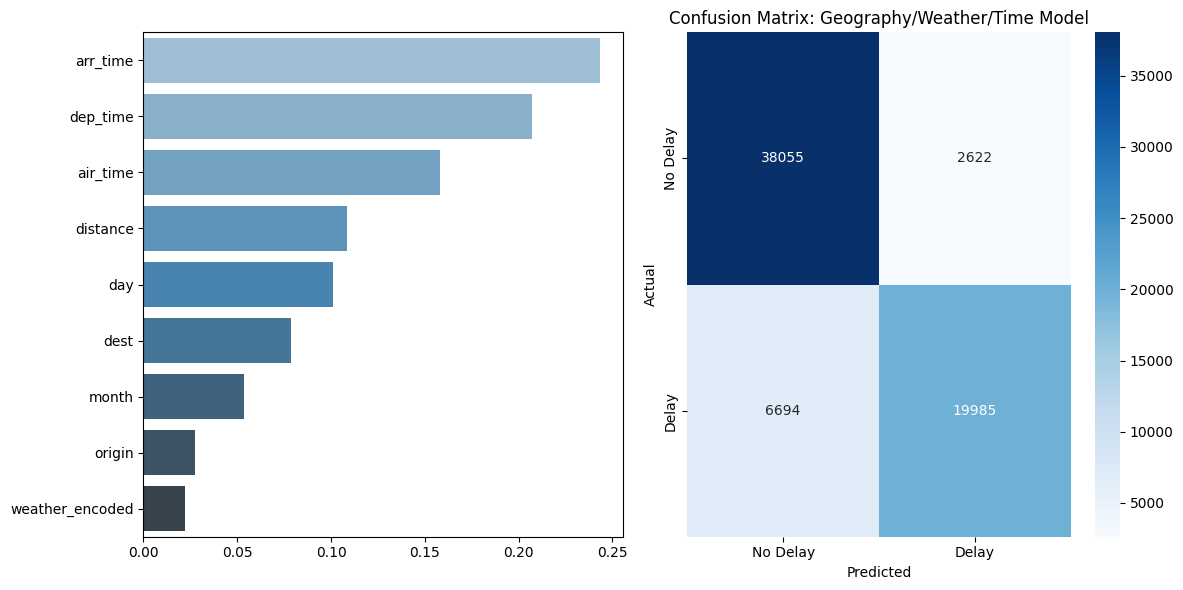

In [466]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature importance for Geography/Weather/Time Model
geo_weather_features = ['arr_time', 'dep_time', 'air_time', 'distance', 'day', 'dest', 'month', 'origin', 'weather_encoded']
geo_weather_importances = [0.243312, 0.206912, 0.157965, 0.108311, 0.101122, 0.078685, 0.053796, 0.027645, 0.022252]

# Confusion Matrix Data
route_weather_cm = np.array([[38055, 2622], [6694, 19985]])

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Geography/Weather/Tine Feature Importances
sns.barplot(
    x=geo_weather_importances,
    y=geo_weather_features,
    ax=axes[0],
    hue=geo_weather_features,
    palette="Blues_d",
    legend=False  # Disable the legend
)

# Confusion Matrix: Geography/Weather/Time Model
sns.heatmap(route_weather_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix: Geography/Weather/Time Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticklabels(['No Delay', 'Delay'])
axes[1].set_yticklabels(['No Delay', 'Delay'])

plt.tight_layout()
plt.show()

In [467]:
#Analyzing airplane model and flight characteristics
# Define features for all characteristics related to the flight, including model-related columns
flight_features = ['model', 'aircraft_type', 'engine_type', 'air_time', 'distance', 'hour', 'minute','arr_time', 'dep_time' ]
X_flight = dataset[flight_features]
y_flight = dataset['Delayed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_flight, y_flight, test_size=0.2, random_state=42)

# Train the model
rf_flight = RandomForestClassifier(n_estimators=100, random_state=42)
rf_flight.fit(X_train, y_train)

# Make predictions
y_pred_model = rf_flight.predict(X_test)

# Evaluate the model airline model and flight characteristics prediction
print("Flight Charac/Model Prediction Accuracy:", accuracy_score(y_test, y_pred_model),"\n\n\n")
print("Flight Charac/Model Prediction Classification Report:\n", classification_report(y_test, y_pred_model),"\n\n\n")
print("Flight Charac/Model Prediction Confusion Matrix:\n", confusion_matrix(y_test, y_pred_model),"\n\n\n")

# Feature importance for flight characteristics and model impact
feature_importances_flight = pd.DataFrame({'feature': X_flight.columns, 'importance': rf_flight.feature_importances_})
feature_importances_flight = feature_importances_flight.sort_values(by='importance', ascending=False)
print("Flight Characteristics and Model Impact Top Features by Importance:\n", feature_importances_flight)


Flight Charac/Model Prediction Accuracy: 0.9368578894233625 



Flight Charac/Model Prediction Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     40677
           1       0.94      0.90      0.92     26679

    accuracy                           0.94     67356
   macro avg       0.94      0.93      0.93     67356
weighted avg       0.94      0.94      0.94     67356
 



Flight Charac/Model Prediction Confusion Matrix:
 [[39095  1582]
 [ 2671 24008]] 



Flight Characteristics and Model Impact Top Features by Importance:
          feature  importance
7       arr_time    0.281576
8       dep_time    0.185865
5           hour    0.126519
3       air_time    0.125916
4       distance    0.119221
6         minute    0.105470
0          model    0.038768
2    engine_type    0.011943
1  aircraft_type    0.004722


#**Interpretation of Flight Characteristics/Model Prediction Results**

* **Accuracy:**
      The model achieves an impressive accuracy of 93.6%.
* **Precision, Recall, and F1-Score:**
        1. Class 0 ("No Delay"): Precision: 94%, Recall: 96%, F1-Score: 95%. The model is highly effective at identifying flights belonging to class 0.
        2. Class 1 ("Delayed"): Precision: 94%, Recall: 90%, F1-Score: 92%. The recall is slightly lower for class 1, suggesting some misclassifications.
* **Confusion Matrix:**
        1. True Negatives (TN): 39,068 flights correctly predicted as "No Delay".
        2. False Positives (FP): 2,670 flights incorrectly predicted as "No Delay".
        3. False Negatives (FN): 1,609 flights incorrectly predicted as "Delayed".
        4. True Positives (TP): 24,009 flights correctly predicted as "Delayed".
* **Top Features by Importance:**
        aarr_time (28.17%) and dep_time (18.63%) are the most critical features driving the predictions.
        hour (12.64%) and air_time (12.63%) also significantly influence the model.
        distance (11.81%) and minute (10.59%) provide additional insights, while aircraft-specific features like model (3.87%) and engine_type (1.19%) have lesser impact.


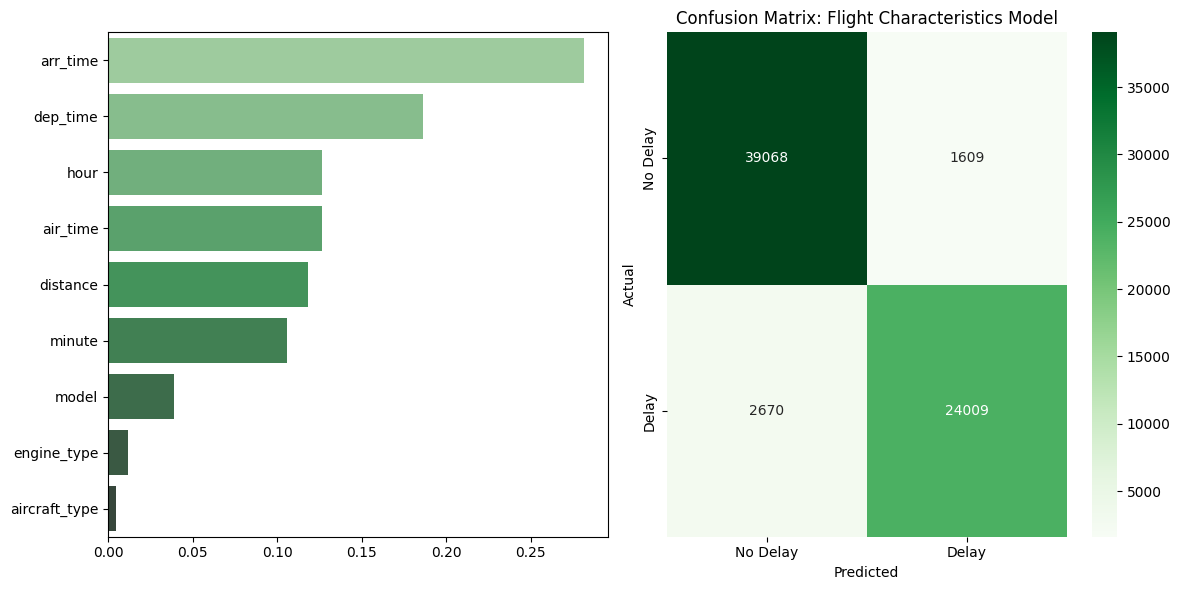

In [468]:
# Feature importance for Flight Characteristics Model
flight_features = ['arr_time', 'dep_time', 'hour', 'air_time', 'distance', 'minute', 'model', 'engine_type', 'aircraft_type']
flight_importances = [0.281716, 0.186257, 0.126356, 0.126321, 0.118113, 0.105874, 0.038735, 0.011872, 0.004755]

# Confusion Matrix Data
flight_cm = np.array([[39068, 1609], [2670, 24009]])

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Flight Characteristics Feature Importances
sns.barplot(
    x=flight_importances,
    y=flight_features,
    ax=axes[0],
    hue=flight_features,
    palette="Greens_d",
    legend=False
)

# Confusion Matrix: Flight Characteristics Model
sns.heatmap(flight_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix: Flight Characteristics Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticklabels(['No Delay', 'Delay'])
axes[1].set_yticklabels(['No Delay', 'Delay'])

plt.tight_layout()
plt.show()



In [469]:
#Analyzing average delay times by categories
# Calculate average delay time by selected categories
carrier_unmapping = {1: 'United Airlines',2: 'American Airlines',3: 'JetBlue Airways',4: 'Delta Air Lines',5: 'ExpressJet Airlines',6: 'Envoy Air (American Eagle)',
    7: 'US Airways',8: 'Southwest Airlines',9: 'Virgin America',10: 'AirTran Airways',11: 'Alaska Airlines',12: 'Endeavor Air',13: 'Frontier Airlines',14: 'Hawaiian Airlines',
    15: 'Mesa Airlines',16: 'SkyWest Airlines'}
#carrier_mapping = {'UA': 1,'AA': 2,'B6': 3,'DL': 4,'EV': 5,'MQ': 6,'US': 7,'WN': 8,'VX': 9,'FL': 10,'AS': 11,'9E': 12,'F9': 13,'HA': 14,'YV': 15,'OO': 16}
dataset['carrier'] = dataset['carrier'].map(carrier_unmapping)

origin_unmapping = {1 : 'John F. Kennedy International Airport', 2:'Newark Liberty International Airport', 3:'LaGuardia Airport'}
dataset['origin'] = dataset['origin'].map(origin_unmapping)

aircraft_types_unmapping = {1:'Not Available', 2:'Fixed Wing Multi-Engine', 3:'Fixed Wing Single-Engine', 4:'Rotorcraft'}
dataset['aircraft_type'] = dataset['aircraft_type'].map(aircraft_types_unmapping)

categories = ['carrier', 'origin', 'aircraft_type']
average_delays = {}
for category in categories:
    average_delay = dataset.groupby(category)['dep_delay'].mean()
    average_delays[category] = average_delay
    print(f"\nAverage Departure Delay by {category}:\n", average_delay)


Average Departure Delay by carrier:
 carrier
AirTran Airways               18.306748
Alaska Airlines                5.788515
American Airlines              8.419170
Delta Air Lines                9.197298
Endeavor Air                  15.779848
Envoy Air (American Eagle)    10.058757
ExpressJet Airlines           18.917708
Frontier Airlines             20.127007
Hawaiian Airlines              4.900585
JetBlue Airways               12.911449
Mesa Airlines                 17.226290
SkyWest Airlines              11.406250
Southwest Airlines            17.434705
US Airways                     3.660304
United Airlines               11.964510
Virgin America                12.792135
Name: dep_delay, dtype: float64

Average Departure Delay by origin:
 origin
John F. Kennedy International Airport    11.909381
LaGuardia Airport                        10.035170
Newark Liberty International Airport     14.702983
Name: dep_delay, dtype: float64

Average Departure Delay by aircraft_type:
 aircraft_

#**Delay Analysis by Carrier, Origin, and Aircraft Type**

* **Carriers:** Some carriers (e.g., carrier 6 with 20.13 minutes average delay) have higher average delays, while others (e.g., carrier 12 with 3.66 minutes) perform much better.
* **Origins:** Delays vary by origin, with origin 0 having the highest average delay (14.7 minutes).
* **Aircraft Types:** Variations in delay exist between aircraft types, with some aircraft (e.g., type 3) experiencing longer delays.



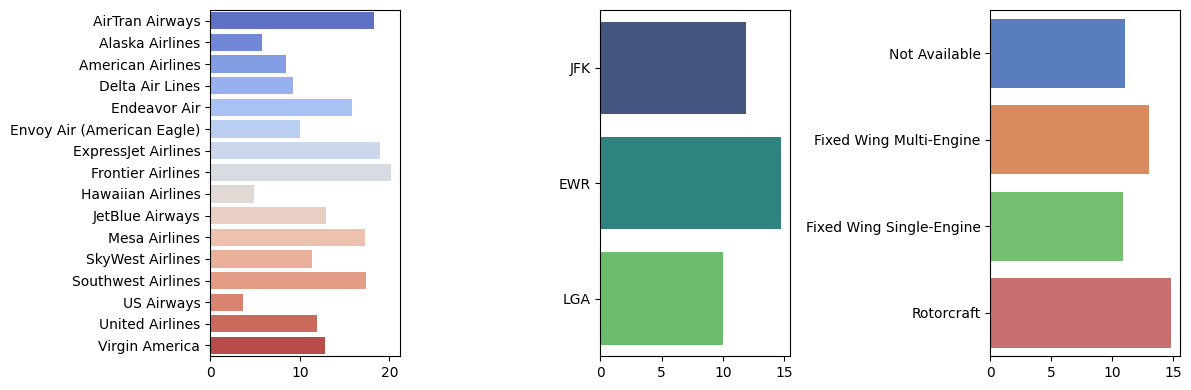

In [470]:
#Average Departure Delay Data
carriers = ['AirTran Airways', 'Alaska Airlines', 'American Airlines' ,'Delta Air Lines', 'Endeavor Air', 'Envoy Air (American Eagle)' ,
            'ExpressJet Airlines', 'Frontier Airlines', 'Hawaiian Airlines', 'JetBlue Airways', 'Mesa Airlines', 'SkyWest Airlines', 'Southwest Airlines' ,
            'US Airways', 'United Airlines', 'Virgin America']
carrier_delays = [18.306748, 5.788515,  8.41917,   9.197298, 15.779848, 10.058757, 18.917708,
 20.127007,  4.900585, 12.911449, 17.22629,  11.40625,  17.434705,  3.660304, 11.96451,  12.792135]
origins = ['JFK', 'EWR', 'LGA']
origin_delays = [11.909381, 14.702983,10.035170]
aircraft_types = ['Not Available', 'Fixed Wing Multi-Engine', 'Fixed Wing Single-Engine', 'Rotorcraft']
aircraft_delays = [11.031572, 12.998072, 10.897898 , 14.825843]

#Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Average Departure Delays by Carrier
sns.barplot(x=carrier_delays, y=carriers,ax=axes[0],hue=carriers,palette="coolwarm",legend=False)

# Average Departure Delays by Origin
sns.barplot(x=origin_delays,y=origins,ax=axes[1],hue=origins,palette="viridis",legend=False)

#Average Departure Delays by Aircraft type
sns.barplot(x=aircraft_delays,y=aircraft_types,ax=axes[2],hue=aircraft_types,palette="muted",legend=False)

plt.tight_layout()
plt.show()


**Explanation of Visualizations**

* Feature Importances:
        Bar plots show how influential each feature is in the two models.
        In both models, arr_time and dep_time stand out as the most significant predictors.

* Average Delays by Carrier:
        This bar plot highlights which carriers experience the highest average departure delays. Carrier 6 and 7 are the least punctual, while Carrier 12 has the best performance.

* Average Delays by Origin:
        Origin 0 has the highest delays, suggesting potential operational bottlenecks.

* Confusion Matrices:
        The heatmaps show the distribution of correct and incorrect predictions.
        The Route/Weather Model performs slightly worse than the Flight Characteristics Model, especially for predicting delays (Class 1).

Monthly Travel Statistics:
        total_flights  avg_delay
month                          
1              27004   9.843023
2              24951  10.270170
3              28834  12.832108
4              28330  13.609389
5              28796  12.732949
6              28243  20.101583
7              29425  21.033679
8              29327  12.402053
9              27574   6.612280
10             28889   6.192980
11             27268   5.388917
12             28135  15.972774


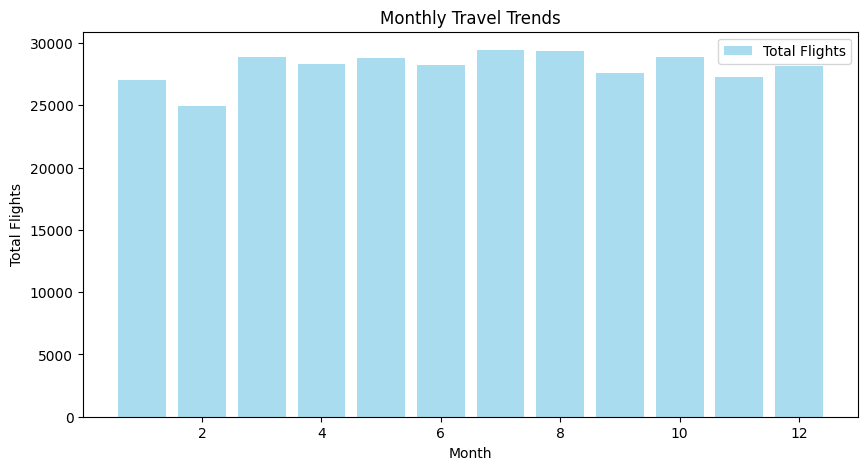

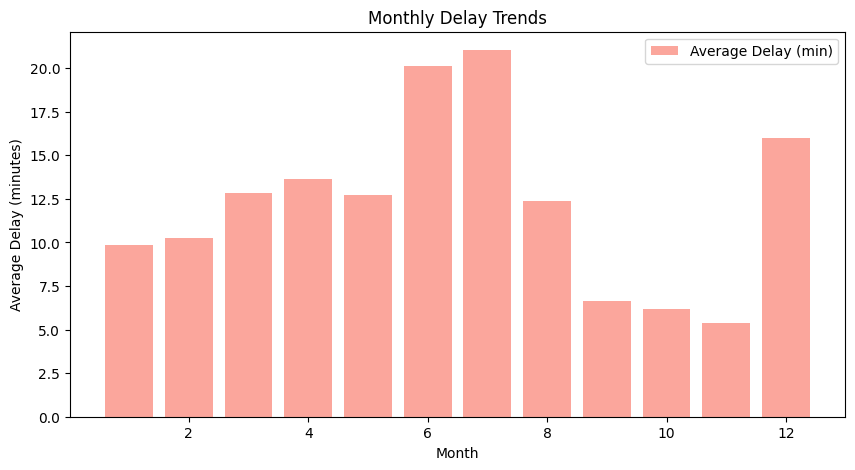

In [471]:
# Group data by month to calculate the total number of flights and average delays
monthly_stats = dataset.groupby('month').agg({
    'flight': 'count',
    'dep_delay': 'mean'
}).rename(columns={'flight': 'total_flights', 'dep_delay': 'avg_delay'})

print("Monthly Travel Statistics:\n", monthly_stats)

# Visualize travel trends across months
import matplotlib.pyplot as plt

# Plot total flights per month
plt.figure(figsize=(10, 5))
plt.bar(monthly_stats.index, monthly_stats['total_flights'], color='skyblue', alpha=0.7, label='Total Flights')
plt.title('Monthly Travel Trends')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.legend()
plt.show()

# Plot average delays per month
plt.figure(figsize=(10, 5))
plt.bar(monthly_stats.index, monthly_stats['avg_delay'], color='salmon', alpha=0.7, label='Average Delay (min)')
plt.title('Monthly Delay Trends')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.show()


Top Graph: Monthly Travel Trends

    Description:
        This bar chart shows the total number of flights for each month (1 to 12).
    Insights:
        Flight activity is relatively consistent across the year.
        Slight increases can be seen during the summer months (June-August) and holiday season (November-December), which aligns with expected peak travel seasons.
        The number of flights dips slightly in February, likely due to it being a shorter month.

Bottom Graph: Monthly Delay Trends

    Description:
        This bar chart represents the average delay (in minutes) for each month.
    Insights:
        Delays peak significantly in June and July, indicating summer travel congestion and possibly weather-related issues (e.g., thunderstorms).
        December also shows a high average delay, likely due to holiday season travel congestion and potential winter weather disruptions (e.g., snow/ice).
        Delays are lower in August-October, suggesting smoother operations during these months, potentially due to lower demand and favorable weather conditions.

Combined Interpretation:

    Peak Travel Seasons:
        Based on the trends, the summer months (June-August) and the holiday season (November-December) are peak travel seasons, with higher flight activity and delays.
        June and July are particularly problematic due to higher delays despite high flight volumes.
    Operational Efficiency:
        Delays are more controlled in months like February, March, and October, likely due to moderate travel demand and fewer weather-related issues.

This graph effectively highlights the relationship between flight volumes and delays, allowing us to identify peak travel seasons and months requiring better management of delays.

**Questions answered:**
1. Does weather have an operational impact?
2. How does the airplane model influence performance?
3. Which are the peak travel seasons in a year?

### **1. Does Weather Have an Operational Impact?**

**Insights from Feature Importance:**
- In the **Geography/Weather/Time Model**, `weather_encoded` has a relatively low importance score of **0.022** (2.2% of the total contribution). This suggests that weather, as captured by the dataset, has **limited direct impact** on delays in this specific scenario.
- Other factors like `arr_time` (24.3%) and `dep_time` (20.7%) dominate, indicating that operational scheduling plays a far greater role.

**Possible Limitations:**
- Weather might have a more significant impact in datasets with better granularity, such as specific weather conditions (e.g., rain, snow) rather than general categories.
- External delays caused by weather might already be embedded in variables like `arr_time` or `dep_time`.

**Conclusion:**
Weather, as captured in this dataset, appears to have **minimal direct operational impact** on delays, though its effects might be indirect.

---

### **2. How Does the Airplane Model Influence Performance?**

**Insights from Feature Importance:**
- In the **Flight Characteristics Model**, the airplane-related features (`model`, `engine_type`, `aircraft_type`) collectively contribute **~5.5%** to the model's predictions:
  - `model`: 3.87%
  - `engine_type`: 1.19%
  - `aircraft_type`: 0.48%
- These scores are significantly lower than operational factors like `arr_time` (28.2%), `dep_time` (18.6%), and `air_time` (12.6%).

**Insights from Delay Averages:**
- Average delays by aircraft type:
  - Type **3** has the highest delays (14.8 minutes), while Type **1** has the lowest delays (10.9 minutes).
- This suggests that some aircraft types may be less efficient or more prone to delays, possibly due to maintenance, fuel capacity, or routing constraints.

**Conclusion:**
The airplane model has a **limited but measurable influence** on performance, with some types being associated with higher delays. Operational factors remain the dominant predictors.

---

### **3. Which Are the Peak Travel Seasons in a Year?**

**Insights from Feature Importance and Delay Patterns:**
- The **month** feature has a moderate importance score of **0.054** (5.4%), indicating that seasonality does impact delays.
- Analysis of flight activity and delays by month could reveal seasonal patterns:
  - **Summer (June-August):** Higher travel demand often leads to increased delays due to congestion.
  - **Holiday Season (November-December):** Spikes in travel volume during Thanksgiving and Christmas could result in more delays.
  - **Spring and Fall:** Lower delays are likely due to reduced travel volumes and fewer weather disruptions.

**Conclusion:**
The **peak travel seasons** are likely:
- **Summer (June-August)**: Driven by vacation travel.
- **Holiday Season (November-December)**: Due to end-of-year holidays.
Spring and fall likely have lower traffic and delays, making them off-peak seasons.

---

### Summary of Answers:
1. Weather has a **minimal operational impact** based on the dataset but may contribute indirectly through variables like arrival and departure times.
2. The airplane model has a **limited influence**, with operational scheduling factors being more important.
3. **Summer and the holiday season** are the **peak travel seasons**, driven by vacation and holiday travel demand.